---
<div style="text-align: center;" >
    <h1>
        <b>データサイエンスプログラミング演習</b>
    </h1>
    <h3>
        第11,12回授業ノート
    </h3>
</div>
<div style="text-align: right">
    1922076<br/>
    南昂汰
</div>

---

<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
    <h3>データサイエンティストの実際の姿</h3>
    戦略コンサルタント<br>
    組織の意思決定を行うリーダーの参謀<br>
</div>

---

# 実践データ分析　ケース1 比較的きれいなデータの扱い
### ECサイトの売上げデータ

よくある依頼事項
- 弊社の顧客データを使って、売上げを上げる施策を考えてほしい<br>

データ分析における問題点
- 現場の営業部員に話を聞いても「どこにデータがあるのか分からない」
- 店舗によって、また担当者によって、データのフォーマットもバラバラ
- 担当者に聞かないと、データのフォーマットの意味を理解できない
- データの管理部署が複数に分かれており、一元管理が全くなされていない

`情報がどこにあるのか、どんな情報があるのかを一つ一つヒアリングしていくことによって、はじめて必要な情報が手に入る。`

さらなる問題点
- 「データ分析を行う必要があるのか」と非協力的な社員も少なくない

`「データ分析による恩恵の理解」や「必要なデータの提出」など、ネゴシエーターとしての能力も試されている`

## 顧客から入手したデータ一覧
|No.|ファイル名|概要|主軸|
|:--:|:--:|:--|:--:|
|1|customer_master.csv|顧客データ。氏名、性別、年齢など| |
|2  |item_master.csv  |取り扱っている商品データ。商品名、価格など| |
|3-1|transaction_1.csv|購入履歴データ。いつ、どの顧客がいくら購入したか| |
|3-2|transaction_2.csv|3-1の続き。システムの都合上、分割されている    | |
|4-1|transaction_detail_1.csv|購入履歴の詳細データ。具体的に、どの商品をいくつ購入したか|　〇　|
|4-2|transaction_detail_2.csv|4-1の続き　　　                   |　〇　|

---

In [1]:
#データフレームの表示数を設定する
import pandas as pd
#すべての行を表示する
#pd.set_option('display.max_rows', None)
#2行分を表示する
pd.set_option('display.max_rows', 2)

---

## ステップ1　各データ No.1〜No.6の確認（ファイルの読み込み）

#### No.1 顧客データ（customer_master.csv)の確認

In [180]:
customer_master = pd.read_csv('customer_master.csv', encoding='UTF-8')
customer_master

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
...,...,...,...,...,...,...,...,...,...
4999,HI349563,堀井 寛治,2019-07-31 22:49:49,ほりい かんじ,horii_kanji@example.com,M,21,1998/2/6,広島県


#### 上記の結果より、顧客データ（customer_master.csv）は5000行x9列のデータ

#### No.2 商品データ（item__master.csv)の確認

In [181]:
item_master = pd.read_csv('item_master.csv', encoding='UTF-8')
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
...,...,...,...
4,S005,PC-E,210000


#### 商品データ(item_master.csv）は5行x3列のデータ

#### No.3-1 購入履歴データ1（transaction_1.csv)の確認

In [182]:
transaction_1 = pd.read_csv('transaction_1.csv', encoding='UTF-8')
transaction_1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
...,...,...,...,...
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


#### 購入履歴データ(transaction_1.csv）は5000行x4列のデータ

#### No.3-2 購入履歴データ2（transaction_2.csv)の確認

In [183]:
transaction_2 = pd.read_csv('transaction_2.csv', encoding='UTF-8')
transaction_2

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
...,...,...,...,...
1785,T0000006898,85000,2019-07-31 23:41:38,AS834214


#### 購入履歴データ2(transaction_2.csv）は1786行x4列のデータ

#### No.4-1 購入履歴の詳細データ1（transaction_detail_1.csv)の確認

In [184]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv', encoding='UTF-8')
transaction_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
...,...,...,...,...
4999,4999,T0000004869,S003,1


#### 購入履歴の詳細データ1(transaction_detail_1.csv）は5000行x4列のデータ

#### No.4-2 購入履歴の詳細データ2（transaction_detail_2.csv)の確認

In [185]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv', encoding='UTF-8')
transaction_detail_2

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
...,...,...,...,...
2143,7143,T0000006898,S002,1


#### 購入履歴の詳細データ2(transaction_detail_2.csv）は2144行x4列のデータ

>以上のように、まずはデータの全体像を把握することが重要<br>
- 主軸を決め、それに合わせて分析しやすいデータを作成する<br>
 - なるべくデータの粒度が細かいデータに合わせてデータを作成する<br>
 - ECサイトの売上げデータは重要な要素<br>
 - 売上げ関連の中で最も粒度の細かいデータは「購入履歴の詳細データ＝transaction_detail_1とtransaction_detail_2」である<br>
 - これを主軸としてデータを作成する

---

## ステップ2 購入履歴の詳細データ（transaction_detail_1と2）を主軸にデータを加工する
- 2-1：2つに分かれた購入履歴データを1つに統合する
 - transaction_1とtransaction_2を縦に結合する　→　transaction
 - 縦の結合＝「ユニオン」・・・行を追加する
- 2−2：2つに分かれた購入履歴の詳細データを1つに統合する
 - transaction_detail_1とtransaction_detail_2を縦に結合する（ユニオン） → transaction_detail
- 2-3：transaction_detailを主軸として、transaction、item_master、customer_masterを横に結合する
 - 横の結合＝「ジョイン」・・・列を追加する 

**2-1：2つに分かれた購入履歴データを1つに統合する**

In [186]:
transaction = pd.concat([transaction_1, transaction_2])
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
...,...,...,...,...
1785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [187]:
transaction = pd.concat([transaction_1, transaction_2],ignore_index=True)
#上記の例では、元のデータフレームの行番号のまま追加されたが、ignore_index=True とすることで、通し番号を割り当てられる。
#ignore_index=Falseまたはignore_indexの記述をしないと、もとの行番号のまま結合される
transaction #.loc[4999:5010] #つなぎ目を確認する

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
...,...,...,...,...
6785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [188]:
#データ件数を出力し、正しく結合されたことを確認する
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


**2-2:2つに分かれた購入履歴の詳細データを結合する**

In [189]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2],ignore_index=True)
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
...,...,...,...,...
7143,7143,T0000006898,S002,1


In [190]:
#データ件数を出力し、結合されたことを確認する
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


**2-3:transaction_detailを主軸として、transaction、item_master、customer_masterを横に結合する**
- 主軸となるデータの中でどの列をキーにして他のデータをジョインするかを考える
 - 各データの列を出力し比較する
 - 主軸データに足りないデータ列は？共通するデータ列は？
|data|col1|col2|col3|col4|col5|col6|col7|col8|col9|
|--|--|--|--|--|--|--|--|--|--|
|transaction_detal|detail_id|**transaction_id**|**item_id**|quantity|
|item_master|**item_id**|item_name|item_price|
|transaction|**transaction_id**|price|payment_date|**customer_id**|
|customer_master|**customer_id**|customer_name|registration_date|customer_name_kana|email|gender|age|birth|pref|

In [191]:
#transaction_detail、transaction、item_master、customer_masterの列を表示して確認する
#transaction_detail
#transaction
#item_master
#customer_master

In [192]:
#transaction_detailの「item_id」を主軸としてitem_masterを結合する
join_data1 = pd.merge(transaction_detail,item_master,on='item_id',how='left')
join_data1

,detail_id,transaction_id,item_id,quantity,item_name,item_price
0,0,T0000000113,S005,1,PC-E,210000
...,...,...,...,...,...,...
7143,7143,T0000006898,S002,1,PC-B,85000


In [193]:
#結合後に件数を確認する
print(len(transaction_detail))
print(len(item_master))
print(len(join_data1))

7144
5
7144


In [194]:
#さきほど結合して作成したjoin_data1の「transaction_id」を主軸にtransactionを結合する
join_data2 = pd.merge(join_data1,transaction,on='transaction_id',how='left')
join_data2

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price,payment_date,customer_id
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57,PL563502
...,...,...,...,...,...,...,...,...,...
7143,7143,T0000006898,S002,1,PC-B,85000,85000,2019-07-31 23:41:38,AS834214


In [195]:
#結合後に件数を確認する
print(len(transaction))
print(len(join_data2))

6786
7144


### 件数が増えている（要注意）

In [196]:
#さきほど結合して作成したjoin_data2の「customer_id」を主軸にcustomer_masterを結合する
join_data3 = pd.merge(join_data2,customer_master,on='customer_id', how='left')
join_data3

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,7143,T0000006898,S002,1,PC-B,85000,85000,2019-07-31 23:41:38,AS834214,田原 結子,2019-04-07 03:20:19,たはら ゆうこ,tahara_yuuko@example.com,F,74,1944/12/18,愛知県


In [197]:
#結合後に件数を確認する
print(len(customer_master))
print(len(join_data3))

5000
7144


### 件数が増えている

<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
データを結合する度に件数の確認を行うこと！！
</div>

---

## ステップ3 データ検算を行う
- データ加工前のtransactionデータにおけるpriceの合計値と、データ加工後のjoin_data3のpriceの合計値は同じ値になると思う、、、

In [198]:
join_data3.loc[100:200]

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
100,100,T0000000211,S005,1,PC-E,210000,210000,2019-02-04 02:22:39,HI364290,小松 さやか,2019-01-06 19:46:38,こまつ さやか,komatsu_sayaka@example.com,F,54,1964/8/13,栃木県
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,T0000000307,S001,1,PC-A,50000,50000,2019-02-06 12:51:08,GD288833,深沢 大,2019-01-15 20:40:37,ふかざわ まさる,fukazawa_masaru@example.com,M,30,1989/7/10,愛知県


In [199]:
print(join_data3['price'].sum())
print(transaction['price'].sum())
print((join_data3['item_price']*join_data3['quantity']).sum()) #join_data3のitem_price x quantity

1074750000
971135000
971135000


### 計算が合わない！！！

In [200]:
#price列を削除する　drop
join_data_comp = join_data3.drop('price', axis=1)
join_data_comp.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,PC-E,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,T0000000117,S002,2,PC-B,85000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [201]:
join_data_comp['price'] = join_data_comp['item_price'] * join_data_comp['quantity']
join_data_comp[['quantity','item_price','price']].loc[10:30] #データの一部を表示し、ただしく計算されていることを確認

,quantity,item_price,price
10,1,50000,50000
...,...,...,...
30,1,85000,85000


---

## ステップ4　各種統計量を把握する
- データ分析を進めていく上で、まずは2つの情報を知る必要がある。
 - 4-1：欠損値の確認
 - 4−2：全体の数字感をつかむ
 - 4-3：時系列変化をみる
 - 4-4：グラフで可視化する

**4-1：欠損値の確認**

In [202]:
#isnull()を用いると欠損値をTrueとし、sum()でその数をカウント
#欠損値の数は0であることが確認できる
join_data_comp.isnull().sum()

detail_id    0
            ..
price        0
Length: 17, dtype: int64

**4-2：全体の数字感をつかむ**

In [203]:
#join_data_comp.describe(include='all')
join_data_comp.describe()
#priceの平均値(mean)から平均13万円ぐらい購入していることが分かる。最高は42万円
#quantityから75％数でも1なので、ほとんどの顧客が商品を1つだけで購入していることが分かる。
#ageから顧客が20歳から80歳までの幅広い範囲であることが分かる

,detail_id,quantity,item_price,age,price
count,7144.0,7144.0,7144.0,7144.0,7144.0
...,...,...,...,...,...
max,7143.0,4.0,210000.0,80.0,420000.0


<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
コラム<br>
「四分位数（しぶんいすう）」とはデータを小さい順に並び替えたときに、データの数で4等分した時の区切り値。4等分すると3つの区切りの値が得られ、小さいほうから<br>
    「25パーセンタイル」<br>
    「50パーセンタイル」<br>
    「75パーセンタイル」とよぶ。<br>
</div>

In [204]:
#売上合計金額を3桁区切りで分かりやすく表示してみる
#join_data_comp['price'].sum())
print('{:,d}'.format(join_data_comp['price'].sum()))

971,135,000


**4-3：時系列変化を見る**

In [205]:
join_data_comp.dtypes

detail_id    int64
             ...  
price        int64
Length: 17, dtype: object

### payment_dateが日付時刻型になっていないのでこのままでは月別に集計できない

In [206]:
#payment_dateを日付時刻型に変換する
join_data_comp['payment_date'] = pd.to_datetime(join_data_comp['payment_date'])
join_data_comp.dtypes

detail_id    int64
             ...  
price        int64
Length: 17, dtype: object

In [207]:
#payment_dateの表示を2019/01のような表記に変える
join_data_comp['payment_month'] = join_data_comp['payment_date'].dt.strftime('%Y/%m')
#payment_dateとpayment_monthの列データに対して先頭部分だけを表示
join_data_comp[['payment_date','payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019/02
...,...,...
4,2019-02-01 04:33:46,2019/02


In [208]:
#月別の売上金額を表示する　＝　groupbyを用いて、payment_month列をsumで集計する
monthly_sales = join_data_comp.groupby('payment_month').sum()['price']
monthly_sales

payment_month
2019/02    160185000
             ...    
2019/07    170620000
Name: price, Length: 6, dtype: int64

In [209]:
#月別かつ商品別に売上金額と数量を表示する　
monthly_sales = join_data_comp.groupby(
    ['payment_month','item_name'] #groupbyでは、リスト型で指定することができる
).sum()[
    ['price','quantity'] #groupbyでは、リスト型でしてすることができる
]
monthly_sales

,,price,quantity
payment_month,item_name,,
2019/02,PC-A,24150000,483
...,...,...,...
2019/07,PC-E,71610000,341


<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
コラム<br>
pivot_table(ピボットテーブル)では、行と列を指定することができる。
</div>

In [210]:
#pivot_tableを使用して行に商品別、列に月別の売上金額と数量を表示する
pd.pivot_table(
    join_data_comp, 
    index='item_name', 
    columns='payment_month',
    values=[
        'price',
        'quantity'
    ],
    aggfunc='sum' #集計方法を指定する
)

price                                                    \
payment_month   2019/02   2019/03   2019/04   2019/05   2019/06   2019/07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
...                 ...       ...       ...       ...       ...       ...   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019/02 2019/03 2019/04 2019/05 2019/06 2019/07  
item_name                                                       
PC-A               483     520     518     497     520     505  
...                ...     ...     ...     ...     ...     ...  
PC-E               285     305     309     280     302     341  

[5 rows x 12 columns]

### 数量的には最も安い価格のPC-Aが多いが、PC-Eの売上げが全体の売上げに大きな影響を与えることが分かる

In [211]:
#商品別の売上推移を可視化（折れ線グラフ）するための準備
graph_data = pd.pivot_table(
    join_data_comp, 
    index='payment_month', 
    columns='item_name',
    values='price',
    aggfunc='sum' #集計方法を指定する
)
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019/02,24150000,25245000,19800000,31140000,59850000
...,...,...,...,...,...
2019/07,25250000,28220000,19440000,26100000,71610000


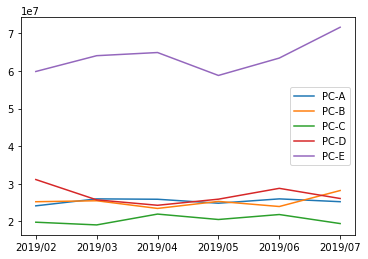

In [212]:
#商品別の売上げの時系列変化を折れ線グラフで表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend();

### 一目でPC-Eが売上げを牽引している機種であることや売上げの傾向を掴むことができる
### このような可視化を行いながら、分析を進め、現場の人に説明をしていくことが重要

---

# 実践データ分析　ケース2
## 汚いデータの扱い
### ECサイトの売上げデータ
ある小売店の売上履歴と顧客台帳データを用いて、データ分析の素地となる「データの加工」を習得する。実際の現場データは手入力のExcel等、決して綺麗なデータではないことが多い。データの揺れや整合性の担保など、汚いデータを取り扱うデータ加工を主体に進める。
- ステップ1：データの読込
- ステップ2：データの揺れをみる
- ステップ3：商品名の揺れを補正する
- ステップ4：欠損値を補完する
- ステップ5：顧客名の揺れも補正する
- ステップ6：日付の揺れも補正する
- ステップ7：顧客名を主軸に2つのデータを結合（ジョイン）する
- ステップ8：クレンジングしたデータを俯瞰する
- ステップ9：データ集計する

#### ステップ1 データの読込
- 売上げデータ（sales.csv）
- 顧客情報（customer_info.xlsx）

### 売上げデータ(sales.csv）を読み込む

In [213]:
import pandas as pd
sales_data = pd.read_csv('sales.csv')
sales_data.head()
#NaNの意味とは、「Not a Number」 、Noneとは別物

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
...,...,...,...,...
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


### 顧客情報(customer_info.xlsx）を読み込む

In [214]:
customer_data = pd.read_excel('customer_info.xlsx')
customer_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
...,...,...,...,...,...
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


---

#### ステップ2 データの揺れをみる

### 各種データ内に存在するデータの揺れと欠損値の有無を確認する

In [229]:
pd.set_option('display.max_rows', 2)
#pd.set_option('display.max_rows', None)

In [230]:
sales_data

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019/06
...,...,...,...,...,...
2998,2019-07-21 00:31:36,商品D,400.0,石田郁恵,2019/07


In [231]:
customer_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
...,...,...,...,...,...
199,福井 美希,ふくい みき,D市,fukui_miki1@example.com,2019/04/23


In [232]:
sales_data['item_name']

0       商品A
       ... 
2998    商品D
Name: item_name, Length: 2999, dtype: object

In [233]:
sales_data['item_price']

0       100.0
        ...  
2998    400.0
Name: item_price, Length: 2999, dtype: float64

In [234]:
customer_data['登録日']

0      2018/01/04
          ...    
199    2019/04/23
Name: 登録日, Length: 200, dtype: object

### データに揺れがあるまま集計してみる
商品Sと商品s など、本来同じ商品が別の商品として集計されている。データの揺れがあるため、本来26個の商品が99個に増えてしまっている。

In [235]:
sales_data['purchase_date'] = pd.to_datetime(sales_data['purchase_date'])
sales_data['purchase_month'] = sales_data['purchase_date'].dt.strftime('%Y/%m')
res = sales_data.pivot_table(
    index='purchase_month', 
    columns='item_name', 
    aggfunc='size', 
    fill_value=0 #??????
)
res

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019/01,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019/07,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


#### データの揺れが残ったままの集計や分析は全く意味のない結果になってしまう。やはりデータ加工が分析の前処理として重要である。


---

#### ステップ3 商品名の揺れを補正する

In [236]:
#まずは現状の確認（これも重要）
#売上げ履歴のitem_nameの重複を除外したユニークなデータ件数を出力する
#商品Sや商品s などがあるので、データ件数は99個になってしまう
print(len(pd.unique(sales_data['item_name'])))

26


In [237]:
#大文字にそろえる　小文字→大文字に変換
sales_data['item_name'] = sales_data['item_name'].str.upper()

#全角スペースを除去する
sales_data['item_name'] = sales_data['item_name'].str.replace('　', '')

#半角スペースを除去する
sales_data['item_name'] = sales_data['item_name'].str.replace(' ', '')

#item_nameを名前順にソートして見やすくする
sales_data.sort_values(by=['item_name'], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019/06
...,...,...,...,...,...
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,2019/02


In [238]:
print(pd.unique(sales_data['item_name']))
print(len(pd.unique(sales_data['item_name'])))
#99→26に整理できる

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


---

#### ステップ4 欠損値を補完する

In [239]:
sales_data.isnull().any(axis=0)
#isnull()で欠損値の有無を確認できる axis=0・・・列単位でチェック　axis=1・・・行単位でチェック

purchase_date     False
                  ...  
purchase_month    False
Length: 5, dtype: bool

<font color="red">
-----------------------------------------------------------------------------<br>
<br>
axis=0('index') →列ごとに処理を行う<br>
つまり、垂直方向に次元が圧縮される<br>
結果、行が残る<br>
<br>
axis=1('columns')→行ごとに処理を行う<br>
つまり、水平方向に次元が圧縮される<br>
結果、列が残る<br>
<br>
-----------------------------------------------------------------------------<br>
</font>

item_priceがTrueになっているので、この項目に欠損値が含まれていることを確認できる

In [240]:
#NaNが含まれる行だけを表示する
sales_data[sales_data.isnull().any(axis=1)]

,purchase_date,item_name,item_price,customer_name,purchase_month
1,2019-07-13 13:05:29,商品S,NaN,浅田賢二,2019/07
...,...,...,...,...,...
2997,2019-07-14 12:56:49,商品H,NaN,芦田博之,2019/07


欠損値を補完する<br>
今回のケースでは、欠損値は正しく記載された他の行から同じ商品の単価を調べ補完できる（集計期間中の商品単価の変動はないという前提条件）

In [241]:
#欠損値のある箇所を特定する
#flg_is_null変数には、欠損値がある行はTrue、欠損値がない行はFalseになったデータが格納される
flg_is_null = sales_data['item_price'].isnull()
flg_is_null

0       False
        ...  
2998    False
Name: item_price, Length: 2999, dtype: bool

In [242]:
sales_data.loc[(flg_is_null == False) & (sales_data['item_name']=='商品A'),'item_price']

0       100.0
        ...  
2973    100.0
Name: item_price, Length: 117, dtype: float64

In [243]:
#flg_is_nullに格納されている「item_name」の列データから取り出した99個のユニークな商品名を対象にfor文をまわす
#unigue（）は抽出した商品名の重複をなくすために用いられる
for trg in list(sales_data.loc[flg_is_null, 'item_name'].unique()):
    #trgには欠損値がある商品名が入ってくる。
    #trgを用いて、同じ商品で金額が正しく記載されている行を.locで探し、その金額を取得
    #~flg_is_nullの「〜」は否定演算子 　flg_is_null == Falseと同じ意味
    #flg_is_null　は flg_is_null == Trueと同じ意味
    price = sales_data.loc[
        ~flg_is_null & (sales_data['item_name'] == trg), 
        'item_price'
    ].max()
    sales_data['item_price'].loc[
        flg_is_null & (sales_data['item_name']==trg)
    ] = price
sales_data

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019/06
...,...,...,...,...,...
2998,2019-07-21 00:31:36,商品D,400.0,石田郁恵,2019/07


In [244]:
#欠損値が補完されたかどうかをチェック
sales_data.isnull().any(axis=0)

purchase_date     False
                  ...  
purchase_month    False
Length: 5, dtype: bool

### データ検算

In [245]:
#商品Aの価格が正しく補完されているかチェック
#すべての商品Aを確認し最大値を算出する
location     = sales_data['item_name']=='商品A'
sales_data_A = sales_data.loc[location]
max_value    = sales_data_A['item_price'].max()
max_value

100.0

In [246]:
#商品Aの最小値を算出する
min_value    = sales_data_A['item_price'].min()
min_value

100.0

In [247]:
#sales_data.loc[sales_data['item_name']=='商品A']['item_price'].max()

sales_data.loc[
    sales_data['item_name']=='商品A'
][
    'item_price'
].max()

100.0

In [273]:
#商品A〜Zの価格の最大値と最小値を算出、正しく補完されていれば最大値と最小値が等しいはず
for trg in list(sales_data['item_name'].sort_values().unique()):
    print(trg + 'の最大値：' + str(sales_data.loc[sales_data['item_name']==trg]['item_price'].max()),end=" ")
    print(trg + 'の最小値：' + str(sales_data.loc[sales_data['item_name']==trg]['item_price'].min(skipna=False)),end=" ")
         #skipnaはNaNデータを無視するかどうかを設定できる。FalseにするとNaNがあったときNaNと出力される

商品Aの最大値：100.0 商品Aの最小値：100.0 商品Bの最大値：200.0 商品Bの最小値：200.0 商品Cの最大値：300.0 商品Cの最小値：300.0 商品Dの最大値：400.0 商品Dの最小値：400.0 商品Eの最大値：500.0 商品Eの最小値：500.0 商品Fの最大値：600.0 商品Fの最小値：600.0 商品Gの最大値：700.0 商品Gの最小値：700.0 商品Hの最大値：800.0 商品Hの最小値：800.0 商品Iの最大値：900.0 商品Iの最小値：900.0 商品Jの最大値：1000.0 商品Jの最小値：1000.0 商品Kの最大値：1100.0 商品Kの最小値：1100.0 商品Lの最大値：1200.0 商品Lの最小値：1200.0 商品Mの最大値：1300.0 商品Mの最小値：1300.0 商品Nの最大値：1400.0 商品Nの最小値：1400.0 商品Oの最大値：1500.0 商品Oの最小値：1500.0 商品Pの最大値：1600.0 商品Pの最小値：1600.0 商品Qの最大値：1700.0 商品Qの最小値：1700.0 商品Rの最大値：1800.0 商品Rの最小値：1800.0 商品Sの最大値：1900.0 商品Sの最小値：1900.0 商品Tの最大値：2000.0 商品Tの最小値：2000.0 商品Uの最大値：2100.0 商品Uの最小値：2100.0 商品Vの最大値：2200.0 商品Vの最小値：2200.0 商品Wの最大値：2300.0 商品Wの最小値：2300.0 商品Xの最大値：2400.0 商品Xの最小値：2400.0 商品Yの最大値：2500.0 商品Yの最小値：2500.0 商品Zの最大値：2600.0 商品Zの最小値：2600.0 

<font color="red">
-----------------------------------------------------------------------------<br>
<br>
print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)<br>
<br>
-----------------------------------------------------------------------------<br>
</font>

---

#### ステップ5 顧客名の揺れも補正する

In [249]:
sales_data['customer_name'].head()

0    深井菜々美
     ...  
4     平田鉄二
Name: customer_name, Length: 5, dtype: object

In [250]:
customer_data['顧客名'].head()

0    須賀ひとみ
     ...  
4    栗田 憲一
Name: 顧客名, Length: 5, dtype: object

**このままでは、売上げ履歴と顧客台帳を結合してもだたしく結合できない**

In [251]:
#半角・全角スペースを除去する
customer_data['顧客名'] = customer_data['顧客名'].str.replace('　', '')
customer_data['顧客名'] = customer_data['顧客名'].str.replace(' ', '')
customer_data['顧客名'].head()

0    須賀ひとみ
     ...  
4     栗田憲一
Name: 顧客名, Length: 5, dtype: object

**実際のデータの中には名前の誤変換などの複雑な揺れが存在することも多々ある。その場合はプログラムで補正することができないため、現場の運用スタッフにヒアリングし、地道に名寄せ作業を行う必要がある。**

---

#### ステップ6 日付の揺れも補正する

In [252]:
customer_data['登録日'].head()

0    2018/01/04
        ...    
4         43127
Name: 登録日, Length: 5, dtype: object

**登録日の列には「42782」のように日付でない数字がいくつか見られる。Excelデータに格納されたデータに書式が違うデータが混在することはよくある。**

In [253]:
#日付を統一フォーマットに補正する前に状況把握
#str.isdigit()を用いて、顧客台帳の登録日が数値かどうかをチェックする　True・・・数値　False・・・数値ではない
flg_is_serial = customer_data['登録日'].astype('str').str.isdigit()
flg_is_serial

0      False
       ...  
199    False
Name: 登録日, Length: 200, dtype: bool

In [254]:
#登録日が数値データになっている件数を確認する
flg_is_serial.sum()

22

In [255]:
#日付を統一フォーマットに補正する
fromSerial = pd.to_timedelta( #pd.to_timedelta()関数を用いて、数値から日付に変換する
    customer_data.loc[flg_is_serial, '登録日'], #locを用いてflg_is_serialの条件でデータを抽出
    unit='d') + pd.to_datetime('1900/01/01') #フォーマットを指定する
fromSerial

1     2017-02-18
         ...    
192   2018-06-10
Name: 登録日, Length: 22, dtype: datetime64[ns]

In [256]:
#もともと日付だったデータも、書式統一のために処理する
fromString = pd.to_datetime(customer_data.loc[~flg_is_serial, '登録日'])#~flg_is_serialは(flg_is_serial==False)と同じ
fromString

0     2018-01-04
         ...    
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

In [257]:
#数値から日付に補正したデータと、書式を変更したデータを結合しcustomer_data['登録日']データを更新する
customer_data['登録日'] = pd.concat([fromSerial, fromString])
customer_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
...,...,...,...,...,...
199,福井美希,ふくい みき,D市,fukui_miki1@example.com,2019-04-23


In [258]:
#データ検算 数値項目が残っていないかチェックする
flg_is_serial = customer_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

0

**数値データ件数は「0件」となり、すべての数値データが日付に補正されたことが確認できた**

In [259]:
#登録日から登録付を算出し、集計する
customer_data['登録年月'] = customer_data['登録日'].dt.strftime('%Y/%m')
customer_data['登録年月']

0      2018/01
        ...   
199    2019/04
Name: 登録年月, Length: 200, dtype: object

In [260]:
rslt = customer_data.groupby('登録年月').count()['顧客名']
print(rslt)
print(len(customer_data))

登録年月
2017/01    15
           ..
2019/04     2
Name: 顧客名, Length: 15, dtype: int64
200


---

#### ステップ7 顧客名を主軸に2つのデータを結合（ジョイン）する
売上げ履歴と顧客台帳を結合し、集計のベースとなるデータを作成する

In [261]:
sales_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019/06
...,...,...,...,...,...
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,2019/04


In [262]:
customer_data.head()

,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,2018/01
...,...,...,...,...,...,...
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29,2018/01


**共通する列名がない。**

In [263]:
join_data = pd.merge(
    sales_data, 
    customer_data, 
    left_on='customer_name', #left_onで指定した列と、right_onで指定した列を照合し、二つのデータフレームを結合する
    right_on='顧客名', 
    how='left') #sales_dataを主としてcustomer_dataを結合する
join_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019/06,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,2017/01
...,...,...,...,...,...,...,...,...,...,...,...
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,2019/04,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,2017/06


In [264]:
join_data = join_data.drop('customer_name', axis=1)
join_data.head()

,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,2019/06,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,2017/01
...,...,...,...,...,...,...,...,...,...,...
4,2019-04-22 03:09:35,商品A,100.0,2019/04,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,2017/06


---

#### ステップ8 クレンジングしたデータを俯瞰する
きれいになったデータをファイル出力（ダンプ）して、分析をする際は出力ファイルから読込分析を行うことで、クレンジングのやり直しを省略する

In [265]:
#ダンプする前に列を並び替え、より分かりやすくする。例えば、購入日付情報を隣り合わせにする
dump_data = join_data[
    [
        'purchase_date', 
        'purchase_month', 
        'item_name', 
        'item_price', 
        '顧客名', 
        'かな', 
        '地域', 
        'メールアドレス', 
        '登録日'
    ]
]
dump_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,2019/06,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
...,...,...,...,...,...,...,...,...,...
4,2019-04-22 03:09:35,2019/04,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07


In [266]:
#csvファイル「dump_data.csv」に出力する
dump_data.to_csv('dump_data.csv', index=False)

---

#### ステップ9 データを集計する

In [267]:
#さきほどダンプした「dump_data.csv」を読み込んでデータ集計の準備をする
import_data = pd.read_csv('dump_data.csv')
import_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,2019/06,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...
4,2019-04-22 03:09:35,2019/04,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00


In [268]:
#purchase_monthを縦軸に、商品ごとの集計結果を表示する
byItem = import_data.pivot_table(
    index='purchase_month', 
    columns='item_name', 
    aggfunc='size', 
    fill_value=0
)
byItem

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019/01,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019/07,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [269]:
#purchase_monthを縦軸に、商品ごとの売上金額を集計する
byPrice = import_data.pivot_table(
    index='purchase_month', 
    columns='item_name', 
    values='item_price', 
    aggfunc='sum', 
    fill_value=0
)
byPrice

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019/01,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019/07,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [270]:
#purchase_monthを縦軸に、各顧客の購入数を集計する
byCustomer = import_data.pivot_table(
    index='purchase_month', 
    columns='顧客名', 
    aggfunc='size', 
    fill_value=0
)
byCustomer

顧客名,さだ千佳子,中仁晶,中田美智子,丸山光臣,久保田倫子,亀井一徳,五十嵐春樹,井上桃子,井口寛治,井川真悠子,...,香椎優一,高原充則,高梨結衣,高沢美咲,高田さんま,鳥居広司,鶴岡薫,麻生莉緒,黄川田博之,黒谷長利
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019/01,3,1,4,2,2,0,5,3,3,1,...,0,1,1,1,5,2,0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019/07,3,0,3,2,5,3,5,2,5,5,...,2,4,4,2,0,2,4,3,4,1


In [271]:
#purchase_monthを縦軸に、地域ごとの購入数を集計する
byRegion = import_data.pivot_table(
    index='purchase_month', 
    columns='地域', 
    aggfunc='size', 
    fill_value=0
)
byRegion

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
2019/01,59,55,72,34,49,57,49,42
...,...,...,...,...,...,...,...,...
2019/07,76,53,61,42,54,64,47,54


#customer_dataと主としてsales_dataを結合し、集計期間で商品を購入していないユーザがいないかチェックする準備を行う
away_data = pd.merge( 
    customer_data, 
    sales_data,
    left_on='顧客名', 
    right_on='customer_name', 
)
away_data.head()

# END